In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) # Mount google drive to load training and testing data

Mounted at /content/drive


In [2]:
# This where all the Packages are cached instead or reinstalling them every new runtime
PACKAGES_DIR = '/content/drive/My Drive/Master1/pip_cache'

# This is where MERGED & PREPROCESSED & CLEANED Dataset is
PREPROCESSED_MERGED_DATASET_DIR = '/content/drive/MyDrive/Master1/Sentiment/PREPROCESSED_DATASET/'


# This is where the figures are saved
FIGURES_DIR = '/content/drive/MyDrive/Master1/Sentiment/FIGURES/FIGURES_2/'


TEMPLATES_DIR = '/content/drive/MyDrive/Master1/Sentiment/templates/'



  #########################################################################  PYTORCH ##########################################################

# Directory where the pytorch models will be saved
PY_CUSTOM_CAMEL_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/'

# Directory where the pytorch models will be saved
PY_CUSTOM_CAMEL_MIX_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/'

# Directory where the pytorch models will be saved
PY_CUSTOM_ALANZI_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/alanzi/py/model/'

# i change dropout rate from
PY_CUSTOM_ALANZI2_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/alanzi2/py/model/'

# i change dropout rate from
PY_CUSTOM_ALANZI3_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/alanzi3/py/model/model_2/'


# Directory where the pytorch models will be saved
PY_CUSTOM_ARABERT_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/arabert/py/model/'


# Directory where the pytorch models will be saved
PY_CUSTOM_MARBERT_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/'

# Directory where the purely pytorch models will be saved
PY_ARABERT_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/models/arabert/py/model/'+"checkpoint-19302"

# Directory where the pytorch models will be saved

PY_ENSEMBLE_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/ensemble/'
PY_ENSEMBLE_MODEL_DIR1 = '/content/drive/MyDrive/Master1/Sentiment/custom_models/ensemble1/ensemble2/'

# Number of Figures
FIGURE_COUNTS = 1

PY_CUSTOM_Qarib_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/qarib/py/model/'
PY_CUSTOM_Arab_bert2_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/arabbert2/py/model/'
PY_CUSTOM_Giga_bert_MODEL_DIR = '/content/drive/MyDrive/Master1/Sentiment/custom_models/gigabert/py/model/'



# Packages

In [3]:
!pip config set global.cache-dir /content/drive/My\ Drive/Master1/pip_cache



!pip install --cache-dir '/content/drive/My Drive/Master1/pip_cache'  transformers datasets
!pip install --cache-dir '/content/drive/My Drive/Master1/pip_cache'  torchinfo
!pip install --cache-dir '/content/drive/My Drive/Master1/pip_cache'  evaluate
!pip install --cache-dir '/content/drive/My Drive/Master1/pip_cache'  pydot graphviz
!pip install --cache-dir '/content/drive/My Drive/Master1/pip_cache'  accelerate



# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' ar_wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' python-bidi
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic_reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic-reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' autokeras


from IPython.display import clear_output
clear_output() # clear output window

In [4]:
# Packages
# types in python
from typing import List, Tuple ,Dict ,Any , Union
import time
import string
import os
import random



from collections import Counter


# Data Manipulating  & Preprocessing packages
import numpy as np
from sklearn.preprocessing import LabelEncoder
import unicodedata # normlization of arabic letters encoding to be unicoded
import pandas as pd
pd.set_option('display.max_colwidth', None) # Setting the display option to show the full width of columns in pandas dataframe.




# Model
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from transformers import pipeline
import torch



# Metrics
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve
import evaluate


import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

# visualization library
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Random Seed
RANDOM_SEED=42
RANDOM_STATE=42



def set_seed(seed=42):
  RANDOM_SEED=seed
  RANDOM_STATE=seed
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False



# Set Matplotlib defaults
plt.style.use('ggplot')
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



# Transformers

> we will define general constants for Pytorch(Dynamic Computation Graph)

#### Constants

In [5]:
# CONSTANTS

# batch size
BATCH_SIZE = 32

# number of epochs
EPOCHS = 10

# max length of sequences
MAX_LEN = 80

# Learning Rate of the optimizers
LEARNING_RATE = 5e-5


# Default Epsilon
EPSILON =1e-8


#### Metrics

In [6]:
#from datasets import load_metric
import evaluate
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score




def compute_metrics(eval_preds:Tuple[np.ndarray, np.ndarray]) -> Dict[str, Any]:
  """  called each time the model is evaluated on the validation dataset
        @returns a dictionary of metrics such as accuracy(glu) , acc_score , F1 score, precision,recall,roc_score and auc_score."""
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  # f1-score
  f1_macro = f1_score(labels, predictions, average='macro')
  f1_weighted = f1_score(labels, predictions, average='weighted')
  # precision
  precision_macro = precision_score(labels, predictions, average='macro')
  precision_weighted = precision_score(labels, predictions, average='weighted')
  # recall
  recall_macro = recall_score(labels, predictions, average='macro')
  recall_weighted = recall_score(labels, predictions, average='weighted')

  #acc_score=accuracy_score(labels,predictions)

  metric = evaluate.load("glue", "sst2")
  metrics = metric.compute(predictions=predictions, references=labels)
  metrics.update({
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision_macro": precision_macro,
        "precision_weighted": precision_weighted,
        "recall_macro": recall_macro,
        "recall_weighted": recall_weighted,
      #  'accuracy_score':acc_score
        })
  return metrics




## Transformers using Pytorch

### Packages

In [7]:
from datasets import load_dataset
import evaluate
from transformers import AutoConfig,AutoTokenizer,TFAutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, EarlyStoppingCallback,AutoModelForSequenceClassification
import torch
import os

### Clear Previous Sessions

In [8]:
from keras.backend import clear_session # clears the current Keras session and frees up memory.
import gc
clear_session()

# set the maximum split size to 512 MB
max_split_size_mb = 512


# Clear PyTorch cache (if using a GPU)
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

# Delete existing PyTorch models or variables

model = 'dummy'
optimizer= 'dummy'
tokenizer='dummy'
trainer='dummy'
del model, optimizer,tokenizer,trainer

# set the environment variable
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = f'max_split_size={max_split_size_mb}'


In [9]:
#  check if your system has a compatible NVIDIA G
print(torch.cuda.is_available())

True


### My Preprocessed Labeled Dataset
> Consists of Egyptian and Modern Standard Arabic (MSA) .

>
```
{'LABEL': Value(dtype='int64', id=None),
 'TWEET': Value(dtype='string', id=None)}
```
> Label explaination :

```
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
   }
```

In [10]:
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
}

In [11]:
# # Dataset names
# TRAIN_DATASET_NAME='TRAIN_DATASET'
# VALIDDATION_DATASET_NAME='VALIDATION_DATASET'
# TEST_DATASET_NAME='TEST_DATASET'
# DATASET_NAME = 'DATASET'

# stemmed_data_files = {"train": f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR , TRAIN_DATASET_NAME + '.csv')}",
#               'validation':f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR, VALIDDATION_DATASET_NAME + '.csv' )}",
#               "test": f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR ,TEST_DATASET_NAME + '.csv')}",
#               #"dataset": f"{PREPROCESSED_MERGED_DATASET_DIR +DATASET_NAME}.csv",
#               }

# unstemmed_data_files = {"train": f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR , 'unstemmed/'+TRAIN_DATASET_NAME + '.csv')}",
#               'validation':f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/'+VALIDDATION_DATASET_NAME + '.csv' )}",
#               'test':f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/'+ TEST_DATASET_NAME + '.csv' )}",
#               #"dataset": f"{PREPROCESSED_MERGED_DATASET_DIR +DATASET_NAME}.csv",
#               }

In [12]:
# from datasets import Dataset, DatasetDict
# import pandas as pd
# import os

# # Dataset names
# TRAIN_DATASET_NAME = 'TRAIN_DATASET'
# VALIDDATION_DATASET_NAME = 'VALIDATION_DATASET'
# TEST_DATASET_NAME = 'TEST_DATASET'
# DATASET_NAME = 'DATASET'

# # Data file paths
# stemmed_data_files = {
#     "train": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, TRAIN_DATASET_NAME + '.csv'),
#     "validation": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, VALIDDATION_DATASET_NAME + '.csv'),
#     "test": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, TEST_DATASET_NAME + '.csv'),
# }

# unstemmed_data_files = {
#     "train": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/' + TRAIN_DATASET_NAME + '.csv'),
#     "validation": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/' + VALIDDATION_DATASET_NAME + '.csv'),
#     "test": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/' + TEST_DATASET_NAME + '.csv'),
# }

# # Function to convert CSVs to Hugging Face DatasetDict (with 10% sampling)
# def load_csv_as_datasetdict(data_files: dict, sample_ratio: float = 0.5) -> DatasetDict:
#     # Load each split using pandas
#     train_df = pd.read_csv(data_files["train"])
#     val_df = pd.read_csv(data_files["validation"])
#     test_df = pd.read_csv(data_files["test"])

#     # Sample 10% of each split (shuffle first for randomness)
#     train_df = train_df.sample(frac=sample_ratio, random_state=42).reset_index(drop=True)
#     val_df = val_df.sample(frac=sample_ratio, random_state=42).reset_index(drop=True)
#     test_df = test_df.sample(frac=sample_ratio, random_state=42).reset_index(drop=True)

#     # Convert to Hugging Face Datasets
#     train_dataset = Dataset.from_pandas(train_df)
#     val_dataset = Dataset.from_pandas(val_df)
#     test_dataset = Dataset.from_pandas(test_df)

#     return DatasetDict({
#         "train": train_dataset,
#         "validation": val_dataset,
#         "test": test_dataset
#     })

# # Load both datasets with 10% of the data
# stemmed_dataset = load_csv_as_datasetdict(stemmed_data_files, sample_ratio=0.5)
# dataset = load_csv_as_datasetdict(unstemmed_data_files, sample_ratio=0.5)

# # Optional: Check sample
# print(" Stemmed Dataset (10%):", stemmed_dataset)
# print(" Unstemmed Dataset (10%):", dataset)


In [13]:
from datasets import Dataset, DatasetDict
import pandas as pd
import os

# Dataset names
TRAIN_DATASET_NAME = 'TRAIN_DATASET'
VALIDDATION_DATASET_NAME = 'VALIDATION_DATASET'
TEST_DATASET_NAME = 'TEST_DATASET'
DATASET_NAME = 'DATASET'

# Data file paths
stemmed_data_files = {
    "train": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, TRAIN_DATASET_NAME + '.csv'),
    "validation": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, VALIDDATION_DATASET_NAME + '.csv'),
    "test": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, TEST_DATASET_NAME + '.csv'),
}

unstemmed_data_files = {
    "train": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/' + TRAIN_DATASET_NAME + '.csv'),
    "validation": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/' + VALIDDATION_DATASET_NAME + '.csv'),
    "test": os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/' + TEST_DATASET_NAME + '.csv'),
}

# Function to convert CSVs to Hugging Face DatasetDict (with 10% sampling)
# def load_csv_as_datasetdict(data_files: dict, sample_ratio: float = 0.5) -> DatasetDict:
#     # Load each split using pandas
#     train_df = pd.read_csv(data_files["train"])
#     val_df = pd.read_csv(data_files["validation"])
#     test_df = pd.read_csv(data_files["test"])

#     # Sample 10% of each split (shuffle first for randomness)
#     train_df = train_df.sample(frac=sample_ratio, random_state=42).reset_index(drop=True)
#     val_df = val_df.sample(frac=sample_ratio, random_state=42).reset_index(drop=True)
#     test_df = test_df.sample(frac=sample_ratio, random_state=42).reset_index(drop=True)

#     # Convert to Hugging Face Datasets
#     train_dataset = Dataset.from_pandas(train_df)
#     val_dataset = Dataset.from_pandas(val_df)
#     test_dataset = Dataset.from_pandas(test_df)

#     return DatasetDict({
#         "train": train_dataset,
#         "validation": val_dataset,
#         "test": test_dataset
#     })

# # Load both datasets with 10% of the data
# stemmed_dataset = load_csv_as_datasetdict(stemmed_data_files, sample_ratio=0.5)
# dataset = load_csv_as_datasetdict(unstemmed_data_files, sample_ratio=0.5)

# # Optional: Check sample
# print(" Stemmed Dataset (10%):", stemmed_dataset)
# print(" Unstemmed Dataset (10%):", dataset)


#  Function to convert CSVs to Hugging Face DatasetDict
def load_csv_as_datasetdict(data_files: dict) -> DatasetDict:
    # Load each split using pandas
    train_df = pd.read_csv(data_files["train"])
    val_df = pd.read_csv(data_files["validation"])
    test_df = pd.read_csv(data_files["test"])

    # Convert to Hugging Face Datasets
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)
    test_dataset = Dataset.from_pandas(test_df)

    return DatasetDict({
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    })

#  Load both datasets
stemmed_dataset = load_csv_as_datasetdict(stemmed_data_files)
dataset = load_csv_as_datasetdict(unstemmed_data_files)

#  Optional: Check sample
print(" Stemmed Dataset:", stemmed_dataset)
print(" Unstemmed Dataset:", dataset)

 Stemmed Dataset: DatasetDict({
    train: Dataset({
        features: ['TWEET', 'LABEL'],
        num_rows: 15714
    })
    validation: Dataset({
        features: ['TWEET', 'LABEL'],
        num_rows: 5238
    })
    test: Dataset({
        features: ['TWEET', 'LABEL'],
        num_rows: 5239
    })
})
 Unstemmed Dataset: DatasetDict({
    train: Dataset({
        features: ['TWEET', 'LABEL'],
        num_rows: 15714
    })
    validation: Dataset({
        features: ['TWEET', 'LABEL'],
        num_rows: 5238
    })
    test: Dataset({
        features: ['TWEET', 'LABEL'],
        num_rows: 5239
    })
})


In [14]:
# explore Features
dataset['train'].features

{'TWEET': Value(dtype='string', id=None),
 'LABEL': Value(dtype='int64', id=None)}

In [15]:
df=pd.DataFrame(dataset['train'])
df.sample(5)

,TWEET,LABEL
9530,العروسة جميلة اوى ما شاء الله .,0
14176,#لما_أموت نفسي ربنا يغفرلي,2
9813,تحدي بيني وبين نفسي انى هخلص الملزمة دى قبل بدايه العام الجديد.,0
2157,#تويته_عن_أمن_الدولةصورتين الفرق بينهم 59 عاماالاولي يناير 1952 لمتظاهرات ضد الاحتلالالثانية مارس 2011 لمتظاهرات ضد العسكراللهم ثورة https://t.co/WJlePm4lyc,2
14674,يا ولد يا جامد .,0


In [16]:
# prompt: write the code to count samples of each class?

# Function to count samples of each class in a dataset split
def count_class_samples(dataset_split: Dataset) -> Dict[str, int]:
    """
    Counts the number of samples for each class in a dataset split.

    Args:
        dataset_split: A Hugging Face Dataset object representing a dataset split.

    Returns:
        A dictionary where keys are class labels (integers) and values are their counts.
    """
    return dict(Counter(dataset_split['LABEL']))

# Count samples for each split in the 'dataset' (unstemmed)
train_class_counts = count_class_samples(dataset['train'])
validation_class_counts = count_class_samples(dataset['validation'])
test_class_counts = count_class_samples(dataset['test'])

print("Class distribution in training set:", train_class_counts)
print("Class distribution in validation set:", validation_class_counts)
print("Class distribution in test set:", test_class_counts)

# You can also count for the stemmed dataset if needed
# stemmed_train_class_counts = count_class_samples(stemmed_dataset['train'])
# print("Class distribution in stemmed training set:", stemmed_train_class_counts)


Class distribution in training set: {2: 4914, 0: 5400, 1: 5400}
Class distribution in validation set: {2: 1638, 1: 1800, 0: 1800}
Class distribution in test set: {2: 1639, 0: 1800, 1: 1800}


<Axes: >

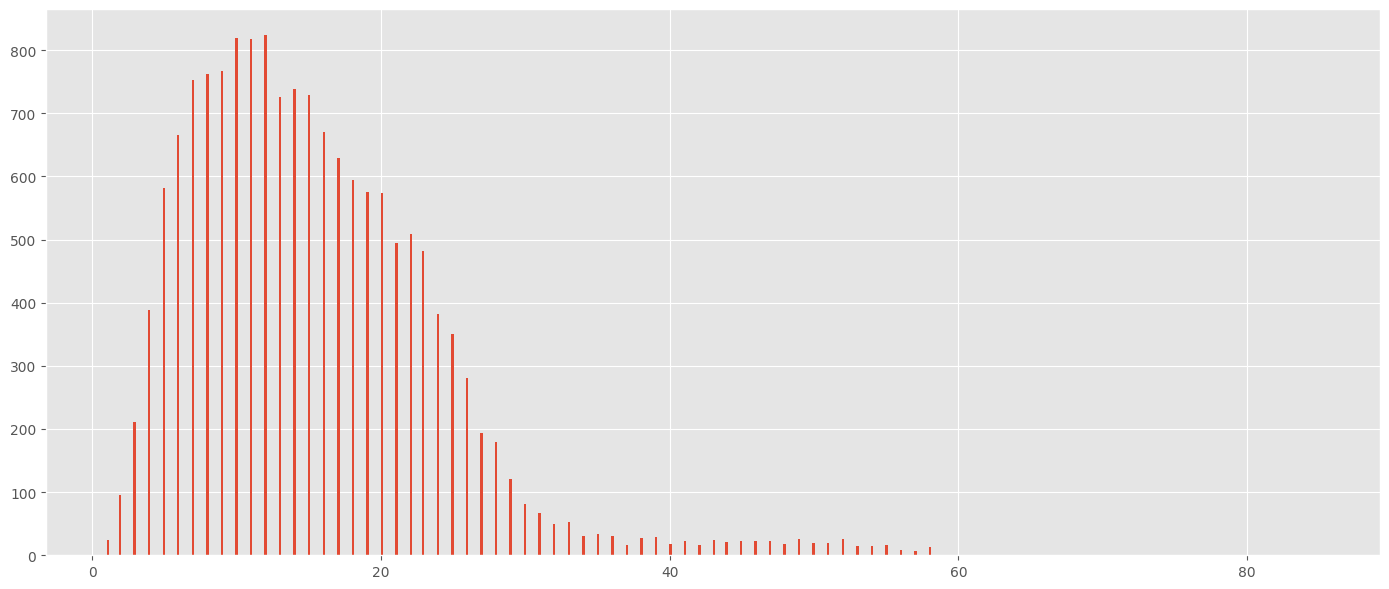

In [17]:
from nltk.tokenize import TweetTokenizer
Tweet_Tokenizer = TweetTokenizer()
df['TWEET'].map(lambda tweet: len(Tweet_Tokenizer.tokenize(tweet))).hist(bins = 500)

#### Data Collator

> Dynamic padding means the samples in this batch should all be padded to a length of 67, the maximum length inside the batch. Without dynamic padding, all of the samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept

In [18]:
from typing import Dict, Tuple
from torch.utils.data import DataLoader, Dataset,RandomSampler,SequentialSampler,TensorDataset

def data_loader(dataset:Dataset,
                tokenizer:AutoTokenizer) -> Tuple[DataLoader, DataLoader,DataLoader]:
    # Convert labels data types to torch.Tensor
  train_labels = torch.tensor(dataset['train']['LABEL'])
  val_labels = torch.tensor(dataset['validation']['LABEL'])
  test_labels = torch.tensor(dataset['test']['LABEL'])


  train_inputs, train_masks = preprocessing_for_bert(tokenizer = tokenizer,
                                                    text_preprocessing_fn = None,
                                                    data = dataset['train']['TWEET'])
  val_inputs, val_masks = preprocessing_for_bert(tokenizer = tokenizer,
                                                text_preprocessing_fn = None,
                                                data = dataset['validation']['TWEET'])
  test_inputs, test_masks = preprocessing_for_bert(tokenizer = tokenizer,
                                                text_preprocessing_fn = None,
                                                data = dataset['test']['TWEET'])




  # randomly samples elements from a dataset without replacement
  # Create the DataLoader for our training set
  train_data = TensorDataset(train_inputs, train_masks, train_labels)
  # defines the strategy to draw Random samples from the dataset
  train_sampler = RandomSampler(train_data)
  train_dataloader = DataLoader(
      train_data, sampler=train_sampler,  batch_size=BATCH_SIZE , drop_last=True
  )

  # Create the DataLoader for our validation set
  val_data = TensorDataset(val_inputs, val_masks, val_labels)
  # samples elements from a given sequence in a sequential order
  # defines the strategy to draw Sequential samples from the dataset
  eval_sampler = SequentialSampler(val_data)
  eval_dataloader = DataLoader(
      val_data, sampler=eval_sampler, batch_size=BATCH_SIZE
  )
  # Create the TensorDataset for our test set
  test_dataset = TensorDataset(test_inputs, test_masks, test_labels)


  # Create the DataLoader for our test set
  test_sampler = SequentialSampler(test_dataset)

  test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)
  del dataset

  return train_dataloader , eval_dataloader ,test_dataloader

### Tokenizer

In [19]:
import torch
from transformers import AutoTokenizer
from tqdm.auto import tqdm as ProgressBar

def preprocessing_for_bert(tokenizer: AutoTokenizer,
                           data: np.array ,
                           text_preprocessing_fn) -> Tuple[torch.Tensor, torch.Tensor]:
    """Perform required preprocessing steps for pretrained BERT.
    @param    tokenizer (AutoTokenizer): Instance of BERT tokenizer.
    @param    data (np.array): Array of texts to be processed.
    @param    model_name (str): Name of BERT model used for tokenization.
    @param    text_preprocessing_fn: Function to preprocess text data.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
   """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []


    # Progress bar for tracking progress
    progress_bar = ProgressBar(range(len(data)))

    # For every sentence...
    for i, sentence in enumerate(data):
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text= sentence,  #text_preprocessing_fn(sentence),  # Preprocess sentence
            add_special_tokens = True,        # Add `[CLS]` and `[SEP]`
            max_length = MAX_LEN,             # Max length to truncate/pad
            padding='max_length',
            #pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask = True,     # Return attention mask
            truncation=True,
        )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
        progress_bar.update(1)

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks


### Model Initialization - BertClassifier

In [20]:
from typing import Optional , Dict
import torch
import torch.nn as nn
from transformers import AutoModel , AutoConfig

import pickle

def load_model_from_checkpoint(model:nn.Module,save_dir:Optional[str] = None,checkpoint:Optional[str]= None):
      """
      load model from specific checkpoint
      """
      if save_dir is not None and checkpoint is not None:
        checkpoint_path = os.path.join(save_dir,checkpoint)
        print(f'Loading model from this checkpoint {checkpoint_path}')

        checkpoint = torch.load(checkpoint_path,map_location=device)
        model.load_state_dict(checkpoint)

        print(f'loaded checkpoint of {model.model_name} successfully')
      return model


In [21]:

class BertClassifier(nn.Module):
    """
    BERT-based classifier model for binary classification
    """
    def __init__(self, model_name: str,
                 freeze_bert: bool = False,
                 hidden_size: int = 256,
                 num_hidden_layers: int = 2,
                 dropout_prob: Optional[float] = None ,
                 label2id: Optional[Dict[str,int]] = SENTIMENT_TO_ID,
                 id2label: Optional[Dict[int,str]] = ID_TO_SENTIMENT,
                 ):
        """
        @param    model_name (str): Name of the pre-trained BERT model to use.
        @param    freeze_bert (bool): Set to `True` to freeze BERT layers.
        @param    hidden_size (int): Number of hidden units in the classifier layer.
        @param    num_hidden_layers (int): Number of hidden layers in the classifier.
        @param    dropout_prob (Optional[float]): Dropout probability for the classifier layer.
        """
        super(BertClassifier, self).__init__()
        self.model_name = model_name
        # Load the configuration
        self.load_config(model_name,label2id = label2id ,id2label = id2label )
        # Instantiate BERT model
        self.bert = AutoModel.from_pretrained(model_name , config = self.config)

        # Freeze BERT layers (from updating the weights parameters )if specified
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

        # Define classifier layer
        layers = []
        # holds the number of hidden units in each layer of the BERT model to make it input to the coming layers.
        in_features = self.bert.config.hidden_size

        for i in range(num_hidden_layers):
            #  linear transformation to the input tensor
            linear_layer = nn.Linear(in_features, hidden_size)

            # initialize weights to keep the variance of the activations and gradients roughly the same across different layers,
            # which can help prevent vanishing or exploding gradients during training
            nn.init.xavier_uniform_(linear_layer.weight)

            # Naming the parameters
            # linear_layer.weight.names = ('in_features', 'out_features')
            # linear_layer.bias.names = ('out_features',)

            layers.append(linear_layer)

            #  non-linearity into the model
            if i % 5 == 0:
              layers.append(nn.LeakyReLU())
            elif i % 5 == 1:
              layers.append(nn.GELU())
            elif i % 5 == 2:
              layers.append(nn.ELU())
            elif i % 5 == 3:
              layers.append(nn.Softmax())

            layers.append(nn.LayerNorm(hidden_size))
            if  i% 2 == 0 and dropout_prob is not None:
              # reduces the risk of over-reliance on specific features that may not generalize well
              # randomly sets a fraction of its input units to 0 during each training epoch
                layers.append(nn.Dropout(dropout_prob))

                dropout_prob = dropout_prob * 2

            # in features : 0=>bert 1=>256 2=>128 3=>64
            in_features = hidden_size
            # hidden sizes : 0=>256 1=>128 2=>64 3=>32
            hidden_size = hidden_size // 2


        # we have 3 classes
        # in features :  3=>64
        num_classes = len(label2id) # = 3
        layers.append(nn.Linear(in_features, num_classes))
        self.classifier = nn.Sequential(*layers)
    def load_config(self, model_name:str , id2label : Dict[int,str],label2id : Dict[str,int]):
      self.config = AutoConfig.from_pretrained(model_name, num_labels = 3)
      self.config.id2label = id2label
      self.config.label2id = label2id


    def forward(self, input_ids: torch.Tensor, attention_mask: torch.Tensor) -> torch.Tensor:
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        # outputs[0] = (batch_size, sequence_length, hidden_size)
        # [:, 0, :] = selects all elements along the first dimension (batch size), the first element along the second dimension (which corresponds to the CLS token in BERT), and all elements along the third dimension (hidden size)
        # final shape = (batch_size, hidden_size)
        # [CLS] token is usually used to represent the entire input sequence and used for classification tasks
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits


In [22]:
from torchinfo import summary
def save_architecture_design(save_dir:str,model_name:str ,model):
  if save_dir is not None:
    os.makedirs(save_dir, exist_ok=True)
  with open(os.path.join(save_dir,'architecture.txt'), 'w') as file:
    print(f'{model_name} \n' + f'epochs : {EPOCHS}  \t Batch Size : {BATCH_SIZE} \n' +str(summary(model)),file = file)

In [23]:
def initialize_model(save_dir:str,model_name: str) -> Tuple[BertClassifier,torch.device]:
    """
    Initialize the Bert Classifier, the optimizer and the learning rate scheduler.

    Args:
        model_name (str): model checkpoint from huggingface

    Returns:
        Tuple[BertClassifier, AdamW, get_linear_schedule_with_warmup]: A tuple containing the BertClassifier object,
        the AdamW optimizer object, and the learning rate scheduler object.
    """
    # Instantiate Bert Classifier
    model = BertClassifier(model_name,freeze_bert=False, dropout_prob = 0.25)
    # Tell PyTorch to run the model on GPU
    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs")
        # for parallelizing the training of a neural network across multiple GPUs
        model = torch.nn.DataParallel(model)
    # If there's a GPU available...
    if torch.cuda.is_available():

        # Tell PyTorch to use the GPU.
        device = torch.device("cuda")

        print('There are %d GPU(s) available.' % torch.cuda.device_count())

        print('We will use the GPU:', torch.cuda.get_device_name(0))
        !nvidia-smi

    # If not...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")
    model.to(device)

    save_architecture_design(save_dir,model_name,model)
    return model , device


In [24]:
def evaluate(model: nn.Module, val_dataloader: DataLoader , loss_fn = None) -> Tuple[float, float, float, float, float, float]:
    """
    After the completion of each training epoch, measure the model's performance
    on our validation set for a PyTorch model.
     Args:
        model: A PyTorch model.
        val_dataloader: A PyTorch DataLoader for the validation set.
        loss_fn : it is the loss function
    Returns:
        A tuple of floats with the average loss, accuracy, f1_score (weighted and macro), precision,
        and recall on the validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during the evaluation time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []
    val_f1_weighted = []
    val_f1_macro = []
    val_precision = []
    val_recall = []



    with torch.no_grad():
      # For each batch in our validation set...
      for batch in val_dataloader:
          # Load batch to GPU
          b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

          # Compute the logits
          logits = model(b_input_ids, b_attn_mask)
          if model.model_name == 'AraBERT':
            logits=logits.logits


          # Compute the loss
          loss = loss_fn(logits, b_labels)
          val_loss.append(loss.item())

          # Get the predictions
          preds = torch.argmax(logits, dim=1)

          # Calculate the accuracy rate
          accuracy = (preds == b_labels).cpu().numpy().mean()
          val_accuracy.append(accuracy)

          # Calculate the f1 score (weighted and macro), precision, and recall
          val_f1_weighted.append(f1_score(b_labels.cpu(), preds.cpu(), average='weighted'))
          val_f1_macro.append(f1_score(b_labels.cpu(), preds.cpu(), average='macro'))
          val_precision.append(precision_score(b_labels.cpu(), preds.cpu(), average='weighted'))
          val_recall.append(recall_score(b_labels.cpu(), preds.cpu(), average='weighted'))


    # Compute the average accuracy, loss, f1 score (weighted and macro), precision, and recall over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)
    val_f1_weighted = np.mean(val_f1_weighted)
    val_f1_macro = np.mean(val_f1_macro)
    val_precision = np.mean(val_precision)
    val_recall = np.mean(val_recall)
    return val_loss, val_accuracy, val_f1_weighted, val_f1_macro, val_precision, val_recall




In [25]:
def evaluate_test(model: nn.Module, test_dataloader: DataLoader ,save_dir:str,device ) -> pd.DataFrame:
  loss_fn = nn.CrossEntropyLoss(weight = torch.tensor([1.0,1.0,1.0]).to(device))

  test_loss, accuracy, f1_weighted, f1_macro, precision, recall = evaluate(model, test_dataloader,loss_fn)
  results = [{'loss':test_loss,
                        'accuracy':accuracy,
                        'f1_weighted':f1_weighted,
                        'f1_macro':f1_macro,
                        'precision':precision,
                        'recall':recall,
                                  }]
  results_df = pd.DataFrame(results)
  if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
  model_name = model.model_name
  if len(model_name.split('/')) == 2:
    model_name = model_name.split('/')[1]

  results_path = os.path.join(save_dir, f"{model_name}.csv")

  # Print performance over the entire training data
  print(results_df.head(EPOCHS))
  # save the results into csv

  results_df.to_csv(results_path)
  return results

In [26]:
import time
import torch
import torch.nn as nn
#from transformers import AdamW, get_linear_schedule_with_warmup
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from tqdm.auto import tqdm as ProgressBar
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score




def train(model: nn.Module,
          train_dataloader: DataLoader,
          save_dir:str ,
          eval_dataloader: DataLoader,
          early_stopping_patience:int = 4,
          epochs: int = 4,
          log_steps:int = 1000,
          checkpoint : Optional[str] = None,
          device : torch.device = torch.device("cpu"),
          evaluation: bool = False,
          ) -> None:
    """Train the BertClassifier model.
    """

    # Specifying Loss Function
    loss_fn = nn.CrossEntropyLoss(weight = torch.tensor([1.0,1.0,1.0]).to(device))

    # Create the optimizer
    # To update only the trainable parameters
    optimizer = AdamW(params = [parameter for parameter in list(model.parameters()) if parameter.requires_grad],
                      lr=LEARNING_RATE,    # Default learning rate
                      eps=EPSILON,    # Default epsilon value : value added to the denominator of the AdamW update to improve numerical stability
                      betas=(0.9, 0.999) # Default betas value : exponential decay rates for the first and second moments of the gradients
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs
    print(f'total steps = {len(train_dataloader)} batches * {epochs} epochs = {total_steps} \t Batch Size {BATCH_SIZE}')

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    # Progress bar for tracking progress
    progress_bar = ProgressBar(range(total_steps))

    if save_dir is not None:
      os.makedirs(save_dir, exist_ok=True)

    checkpoint_epoch = 0
    if checkpoint is not None:
      import pickle
      checkpoint_path = os.path.join(save_dir,checkpoint)
      #model_checkpoint_file = open(filename, 'rb')
      print(f'Loading model from this checkpoint {checkpoint_path}')
      #model.load_state_dict(torch.load(filename))
      # load the checkpoint
      checkpoint = torch.load(checkpoint_path,map_location=device)
      model.load_state_dict(checkpoint['model_state_dict'])
      optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
      checkpoint_epoch = checkpoint['epoch'] + 1
      loss = checkpoint['loss']
      print(f'loaded checkpoint of epoch {checkpoint_epoch} successfully')
      progress_bar.update(len(train_dataloader) * checkpoint_epoch)

    # Trainable parameters
    model_parameters = [parameter for parameter in list(model.parameters())  if parameter.requires_grad]


    best_val_accuracy = 0.0 # initialize best validation accuracy to 0.0
    best_model_state_dict = None
    best_epoch = 0

    results = []

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs-checkpoint_epoch):
        epoch_i+=checkpoint_epoch
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()
        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits of shape (batch_size, num_classes)
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss
            loss = loss_fn(logits, b_labels)
            # extract the scalar value of the loss from the tensor and accumulate the loss values
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()


            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients" (gradients become very large)
            torch.nn.utils.clip_grad_norm_(model_parameters,
                                           max_norm = 1.0,
                                           norm_type = 2 # euclidian normalization square root sum of squares
                                           )

            # updates the model parameters using the computed gradients
            optimizer.step()
            # updates the learning rate based on the current epoch
            scheduler.step()

            # Print the loss values and time elapsed for every log_steps batches and the last batch
            if (step % log_steps == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()
            progress_bar.update(1)

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:# After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy, val_f1_weighted, val_f1_macro, val_precision, val_recall = evaluate(model, eval_dataloader,loss_fn=loss_fn)
            results = results + [{'epoch': epoch_i ,
                                  'avg_train_loss':avg_train_loss,
                                  'val_loss':val_loss,
                                  'val_accuracy':val_accuracy,
                                  'val_f1_weighted':val_f1_weighted,
                                  'val_f1_macro':val_f1_macro,
                                  'val_precision':val_precision,
                                  'val_recall':val_recall,
                                  "time elapsed":time.time() - t0_epoch
                                  }]
            results_df = pd.DataFrame(results)
            results_path = os.path.join(save_dir, f"epochs{epoch_i}-results.csv")
            # Print performance over the entire training data
            print(results_df.head(EPOCHS))
            # save the results into csv
            results_df.to_csv(results_path)
            print("-"*70)
            print("\n")
            if(best_val_accuracy <= val_accuracy):
              best_val_accuracy = val_accuracy
              best_epoch = epoch_i
              torch.save(model.state_dict(), os.path.join(save_dir,"best_model.pth"))
              best_model_state_dict = model.state_dict()


        if save_dir is not None: # saving the checkpoint after each epoch
            checkpoint_path = os.path.join(save_dir, f"checkpoint-epoch-{epoch_i+1}.pt")
            torch.save({
            'epoch': epoch_i,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, checkpoint_path)

        if (epoch_i - best_epoch) == early_stopping_patience: # early stopping if there is no improvment in the accuracy
          print(f'Early stopping at epoch {epoch_i} best epoch is {best_epoch}')
          break


    print("Training complete!")
    if best_model_state_dict is not None:
      print(f"loading the best model of epoch {best_epoch+1} based on it's best accuracy {best_val_accuracy}")
      model.load_state_dict(best_model_state_dict)



    # Print performance over the entire training data
    print(results_df.head(len(results)))


### Evaluation - Test Dataset

In [27]:
df_test = pd.read_csv(f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/'+ TEST_DATASET_NAME + '.csv' )}")



In [28]:
# df_test = dataset["test"].to_pandas()


In [29]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from typing import Tuple, List

from tqdm.auto import tqdm as ProgressBar


def bert_predict(model: nn.Module, test_dataloader: DataLoader,device) -> Tuple[List[float],List[float]]:
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.

    Args:
        model (nn.Module): The trained BERT model.
        test_dataloader (DataLoader): The test data loader.

    Returns:
        List[float]: The predicted probabilities for each class.
    """
  # Put the model into the evaluation mode. The dropout layers are disabled during the test time.
    model.eval()

    all_logits = []
    # Progress bar for tracking progress
    progress_bar = ProgressBar(range(len(test_dataloader)))

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(sample.to(device) for sample in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
        progress_bar.update(1)


    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()
    tensor = torch.from_numpy(probs)
    ytest = torch.max(tensor, dim=1)
    return tensor,ytest


In [30]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from typing import Tuple, List

from tqdm.auto import tqdm as ProgressBar


def ensemble_bert_predict(models: List[nn.Module], test_dataloader: DataLoader, device,save_dir:str, contribution_percentages: Optional[List[float]] = None,is_accuracy:Optional[bool]=True) -> Tuple[List[float], List[float],pd.DataFrame,List[float]]:
    """Perform a forward pass on a list of trained BERT models to predict probabilities
    on the test set and ensemble the predictions using weighted averaging based on contribution percentages.

    Args:
        models (List[nn.Module]): The list of trained BERT models.
        test_dataloader (DataLoader): The test data loader.
        device: The device to perform the inference on (e.g. 'cpu' or 'cuda').
        contribution_percentages (List[float], optional): The contribution percentages for each model in the ensemble.
            This should be a list of floats that sum up to 1, representing the weights of each model in the ensemble.
            If not provided, equal contribution percentages will be used for all models. Defaults to None.

    Returns:
        Tuple[List[float], List[float]]: The ensembled predicted probabilities for each class.
    """
    df_path=os.path.join(save_dir,"Models'_Accuracies.csv")
    if os.path.exists(df_path):
      print('successfully loaded accuracies')
      df= pd.read_csv(df_path)
      contribution_percentages = df['contribution_percentage'].tolist()
      accuracies = df['accuracy'].tolist()


    if (contribution_percentages is None or len(models) != len(contribution_percentages)) and is_accuracy:
        # Calculate contribution percentages based on accuracy of each model
        accuracies = []


        print('calculating accuracies ...')
        for model in models:
            # Put the model into the evaluation mode. The dropout layers are disabled during the test time.
            model.eval()

            correct = 0
            total = 0
            # Progress bar for tracking progress
            progress_bar = ProgressBar(range(len(test_dataloader)))

            # For each batch in our test set...
            for batch in test_dataloader:
                # Load batch to device
                b_input_ids, b_attn_mask = tuple(sample.to(device) for sample in batch)[:2]

                # Compute logits
                with torch.no_grad():
                    logits = model(b_input_ids, b_attn_mask)
                 # Calculate accuracy
                if model.model_name == 'AraBERT':
                  predicted = torch.argmax(logits.logits, 1)
                else:
                  _, predicted = torch.max(logits.data, 1)
                total += b_input_ids.size(0)
                correct += (predicted == batch[-1].to(device)).sum().item()
                progress_bar.update(1)

            accuracy = correct / total
            accuracies.append(accuracy)

        # Normalize accuracies to get contribution percentages
        total_accuracy = sum(accuracies)
        contribution_percentages = [round(accuracy / total_accuracy,2) for accuracy in accuracies]
        print(contribution_percentages)
    elif contribution_percentages is None and not is_accuracy:
      contribution_percentages = [round(1/len(models),2)] * len(models)

    assert len(models) == len(contribution_percentages), "Number of models must be equal to number of contribution percentages."
    #assert sum(contribution_percentages) == 1, "Contribution percentages must sum up to 1."
    if save_dir:
      data = []
      for i,contribution_percentage in enumerate(contribution_percentages):
        data =data + [
                {'name':models[i].model_name,
                'contribution_percentage':contribution_percentage,
                 'accuracy':accuracies[i] if is_accuracy else contribution_percentage,
                }
                  ]
      df = pd.DataFrame(data)
      df.to_csv(df_path)
      print(f"Saved Models' Accuracies in {df_path}")

    # Put the models into the evaluation mode. The dropout layers are disabled during the test time.
    for model in models:
        model.eval()

    all_logits = []
    # Progress bar for tracking progress
    progress_bar = ProgressBar(range(len(test_dataloader)))
    print('computing logits ...')

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to device (to extract the first two elements from the tuple, which correspond to b_input_ids and b_attn_mask)
        b_input_ids, b_attn_mask = tuple(sample.to(device) for sample in batch)[:2]

        # Compute logits for each model
        batch_logits = []
        for i, model in enumerate(models):
            with torch.no_grad():
                logits = model(b_input_ids, b_attn_mask)
                if model.model_name == 'AraBERT':
                  logits = logits.logits

            #batch_logits.append(contribution_percentages[i] * F.softmax(logits, dim=1))  # Weighted contribution of each model's logits softmaxed
            batch_logits.append(contribution_percentages[i] * torch.tanh(logits))  # Weighted contribution of each model's logits with Tanh normalization

        # Average logits across models
        avg_logits = sum(batch_logits)
        all_logits.append(avg_logits)
        progress_bar.update(1)

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()
    tensor = torch.from_numpy(probs)
    ytest = torch.max(tensor, dim=1)

    return tensor, ytest, df,contribution_percentages


In [31]:
import torch
from torch import nn
from typing import List,Tuple
from transformers import BertTokenizer

def predict_sentiment(models: List[nn.Module], text: str, tokenizer: BertTokenizer, save_dir:str, device) -> Tuple[str,pd.DataFrame]:
    input_ids, attention_masks = preprocessing_for_bert(tokenizer, [text], text_preprocessing_fn=None)
    # Put the models into evaluation mode. The dropout layers are disabled during the test time.
    class_names = ['positive', 'negative', 'neutral']

    for model in models:
        model.eval()
        model.to(device)  # Load model onto the specified device

    df_path = os.path.join(save_dir, "Models'_Accuracies.csv")
    if os.path.exists(df_path):
        print('successfully loaded accuracies')
        df = pd.read_csv(df_path)
        contribution_percentages = df['contribution_percentage'].tolist()
        accuracies = df['accuracy'].tolist()
    else:
      print("Models'_Accuracies.csv is needed !!!")

    all_logits = []
    model_answers = []  # List to store each model's answers

    for i, model in enumerate(models):
        with torch.no_grad():
            logits = model(input_ids.to(device), attention_mask=attention_masks.to(device))[0]  # Assuming the model takes input_ids and attention_mask as input
        all_logits.append(contribution_percentages[i] * logits)  # Weighted contribution of each model's logits
         # Convert logits to predicted sentiment for the current model
        predicted_sentiment = torch.argmax(logits)
        model_answers = model_answers + [class_names[predicted_sentiment]]

    # Aggregate the logits from all models
    aggregated_logits = torch.stack(all_logits).sum(dim=0)

    # Convert logits to predicted sentiment
    predicted_sentiment = torch.argmax(aggregated_logits)

    # Map the predicted sentiment index to corresponding sentiment label
    predicted_sentiment_label = class_names[predicted_sentiment]


    # concatenate model answers
    df['model_answers'] = model_answers

    df_sorted = df.sort_values(by='accuracy', ascending=False)


    return predicted_sentiment_label,df_sorted


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

def print_classification_report(y_pred:torch.tensor,save_dir:str,title:str):
    global df_test
    y_true = df_test['LABEL']
    y_pred = y_pred.indices


    class_names = ['positive', 'negative', 'neutral']
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Create a heatmap of the classification report
    fig, ax = plt.subplots(figsize=(8, 5))
    im = ax.imshow(report_df.iloc[:-1, :-1], cmap='YlGnBu')
    report_df.to_csv(os.path.join(save_dir,title+".csv"))

    # Set axis labels and ticks
    ax.set_xticks(range(len(class_names)))
    ax.set_yticks(range(len(report_df.index[:-1])))
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.set_yticklabels(report_df.index[:-1])

    # Add text labels to the heatmap
    for i in range(len(report_df.index[:-1])):
        for j in range(len(class_names)):
            ax.text(j, i, "{:.2f}".format(report_df.iloc[i, j]), ha="center", va="center", color="black")
    # Add text labels to the heatmap
    # for i in range(len(report_df.index[:-1])):
    #     for j in range(len(class_names)):
    #         precision = report_df.iloc[i]['precision']
    #         recall = report_df.iloc[i]['recall']
    #         f1_score = report_df.iloc[i]['f1-score']
    #         ax.text(j, i, "{:.2f}\n{:.2f}\n{:.2f}".format(precision, recall, f1_score), ha="center", va="center", color="black")

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Score', rotation=-90, va="bottom")

    # Save the classification report as an image
    plt.tight_layout()
    plt.title(title)
    plt.savefig(os.path.join(save_dir,title),format='png')
    plt.show()
    print(classification_report(y_true, y_pred, target_names=class_names))


In [33]:
def show_confusion_matrix(y_pred:torch.tensor,title:str,save_dir:Optional[str] = None):
  global df_test
  y_true = df_test['LABEL']
  y_pred = y_pred.indices

  class_names = ['positive', 'negative', 'neutral']
  cm = confusion_matrix(y_true,  y_pred)
  df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
  hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="BuPu")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')
  plt.title(title)
  plt.tight_layout()

  if save_dir is not None:
    plt.savefig(os.path.join(save_dir,title),format='png')
  plt.show()



### CAMEL BERT - (DA)

> pretrained on Dialectel only

In [34]:
CAMEL_DA_model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment'

#### Camel-BERT Subword Tokenization

In [35]:
tokenizer = AutoTokenizer.from_pretrained(CAMEL_DA_model_huggingface_checkpoint)

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [36]:
PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer = tokenizer)
train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/15714 [00:00<?, ?it/s]

  0%|          | 0/5238 [00:00<?, ?it/s]

  0%|          | 0/5239 [00:00<?, ?it/s]

#### Training

In [37]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_CUSTOM_CAMEL_MODEL_DIR}checkpoint-*

-rw------- 1 root root 1307290453 Jun 11 23:27 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/checkpoint-epoch-6.pt
-rw------- 1 root root 1307290453 Jun 11 23:26 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/checkpoint-epoch-5.pt
-rw------- 1 root root 1307290453 Jun 11 23:25 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/checkpoint-epoch-4.pt
-rw------- 1 root root 1307290453 Jun 11 23:24 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/checkpoint-epoch-3.pt
-rw------- 1 root root 1307290453 Jun 11 23:23 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/checkpoint-epoch-2.pt
-rw------- 1 root root 1307290453 Jun 11 23:21 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/checkpoint-epoch-1.pt


In [38]:
set_seed(RANDOM_STATE)
model , device = initialize_model(save_dir = PY_CUSTOM_CAMEL_MODEL_DIR,model_name = CAMEL_DA_model_huggingface_checkpoint )

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Wed Jun 18 07:25:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             48W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [39]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                       Param #
BertClassifier                                               --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   23,040,000
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Sequential: 1-2                                            --
│  

In [40]:
train(model= model,
      train_dataloader = train_dataloader,
      eval_dataloader = eval_dataloader,
      save_dir = PY_CUSTOM_CAMEL_MODEL_DIR,
      device = device,
      epochs = EPOCHS,
      checkpoint = None,  # 'checkpoint-epoch-6.pt',
      evaluation = True
      )

total steps = 491 batches * 10 epochs = 4910 	 Batch Size 32


  0%|          | 0/4910 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   490   |   0.552548   |     -      |     -     |   50.47  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        0.552548  0.513609      0.798954         0.799345   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.790666       0.815263    0.798954     57.067091  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   490   |   0.306937   |     -      |     -     |   49.10  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        0.

#### Evaluating

In [41]:
tensor , ytest = bert_predict(model, test_dataloader, device)

  0%|          | 0/164 [00:00<?, ?it/s]

In [42]:
# print_classification_report(ytest)

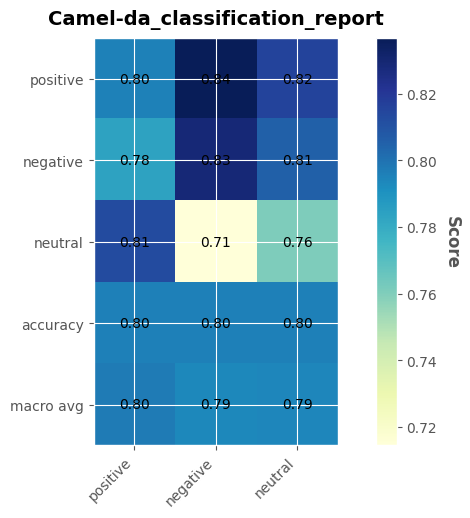

              precision    recall  f1-score   support

    positive       0.80      0.84      0.82      1800
    negative       0.78      0.83      0.81      1800
     neutral       0.81      0.71      0.76      1639

    accuracy                           0.80      5239
   macro avg       0.80      0.79      0.79      5239
weighted avg       0.80      0.80      0.79      5239



In [43]:
print_classification_report(ytest, PY_CUSTOM_CAMEL_MODEL_DIR, 'Camel-da_classification_report')

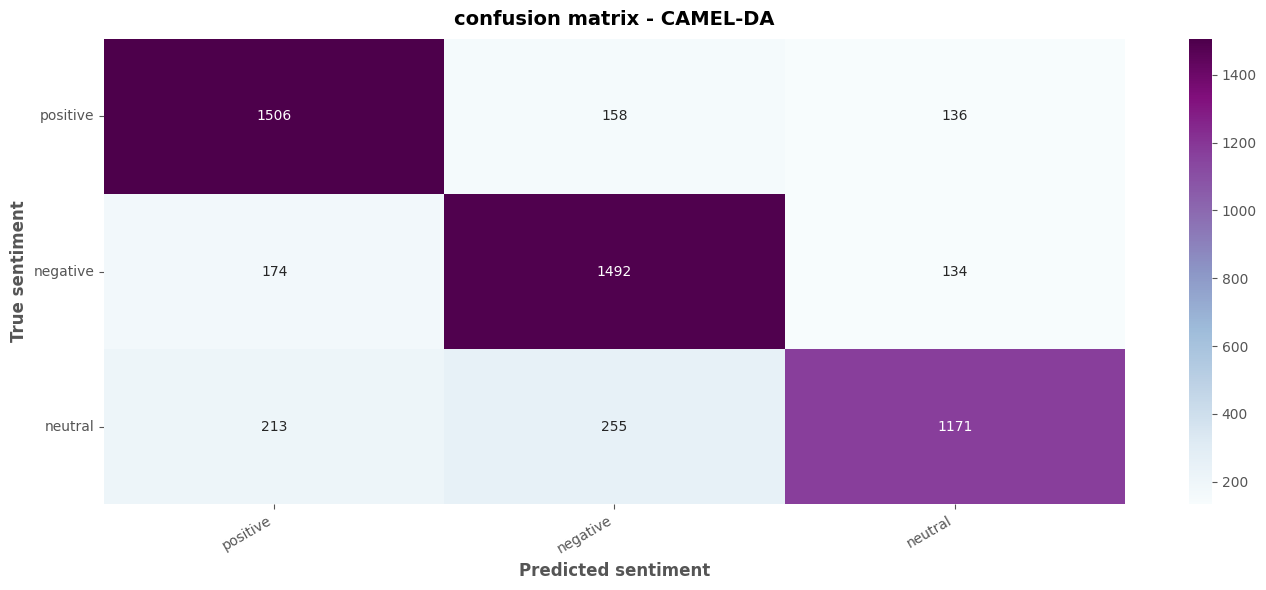

In [44]:
show_confusion_matrix(ytest,title = 'confusion matrix - CAMEL-DA',save_dir = PY_CUSTOM_CAMEL_MODEL_DIR)

### CAMEL-BERT-MIX

> This model card describes CAMeLBERT-Mix (bert-base-arabic-camelbert-mix), a model pre-trained on a mixture of these variants: MSA, DA, and CA.



In [45]:
CAMEL_MIX_model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment'

#### CAMEL-BERT-MIX Subword Tokenization

In [46]:
tokenizer = AutoTokenizer.from_pretrained(CAMEL_MIX_model_huggingface_checkpoint)

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [47]:
PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer = tokenizer)
train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/15714 [00:00<?, ?it/s]

  0%|          | 0/5238 [00:00<?, ?it/s]

  0%|          | 0/5239 [00:00<?, ?it/s]

#### Training

In [48]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_CUSTOM_CAMEL_MIX_MODEL_DIR}checkpoint-*

-rw------- 1 root root 1307290453 Jun 11 22:54 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/checkpoint-epoch-5.pt
-rw------- 1 root root 1307290453 Jun 11 22:53 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/checkpoint-epoch-4.pt
-rw------- 1 root root 1307290453 Jun 11 22:52 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/checkpoint-epoch-3.pt
-rw------- 1 root root 1307290453 Jun 11 22:51 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/checkpoint-epoch-2.pt
-rw------- 1 root root 1307290453 Jun 11 22:49 /content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/checkpoint-epoch-1.pt


In [49]:
set_seed(RANDOM_STATE)
model , device = initialize_model(save_dir = PY_CUSTOM_CAMEL_MIX_MODEL_DIR,model_name = CAMEL_MIX_model_huggingface_checkpoint )

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Wed Jun 18 07:35:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             54W /  400W |    3809MiB /  40960MiB |      0%      Default |
|                                         |                        

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [50]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                       Param #
BertClassifier                                               --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   23,040,000
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Sequential: 1-2                                            --
│  

In [51]:
train(model= model,
      train_dataloader = train_dataloader,
      eval_dataloader = eval_dataloader,
      save_dir = PY_CUSTOM_CAMEL_MIX_MODEL_DIR,
      device = device,
      epochs = EPOCHS,
      checkpoint = None ,#'checkpoint-epoch-7.pt',
      evaluation = True
      )

total steps = 491 batches * 10 epochs = 4910 	 Batch Size 32


  0%|          | 0/4910 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   490   |   0.538280   |     -      |     -     |   49.16  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0         0.53828  0.493677      0.799127         0.799889   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.791245        0.81627    0.799127     55.684401  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   490   |   0.310150   |     -      |     -     |   49.23  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0         0

#### Evaluating

In [52]:
tensor , ytest = bert_predict(model, test_dataloader,device)

  0%|          | 0/164 [00:00<?, ?it/s]

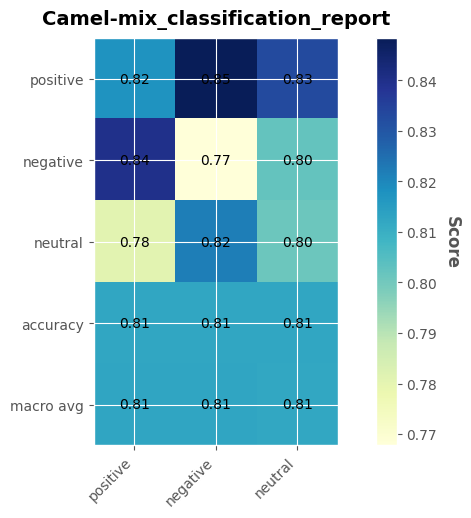

              precision    recall  f1-score   support

    positive       0.82      0.85      0.83      1800
    negative       0.84      0.77      0.80      1800
     neutral       0.78      0.82      0.80      1639

    accuracy                           0.81      5239
   macro avg       0.81      0.81      0.81      5239
weighted avg       0.81      0.81      0.81      5239



In [53]:
print_classification_report(ytest, PY_CUSTOM_CAMEL_MIX_MODEL_DIR, 'Camel-mix_classification_report')

In [54]:
# import os

# def print_classification_report(y_pred, save_dir='./reports', title='Classification Report'):
#   # ... (rest of your function code) ...

#   # Create the directory if it doesn't exist
#   os.makedirs(save_dir, exist_ok=True)

#   report_df.to_csv(os.path.join(save_dir, title + ".csv"))
#   # ... (rest of your function code) ...

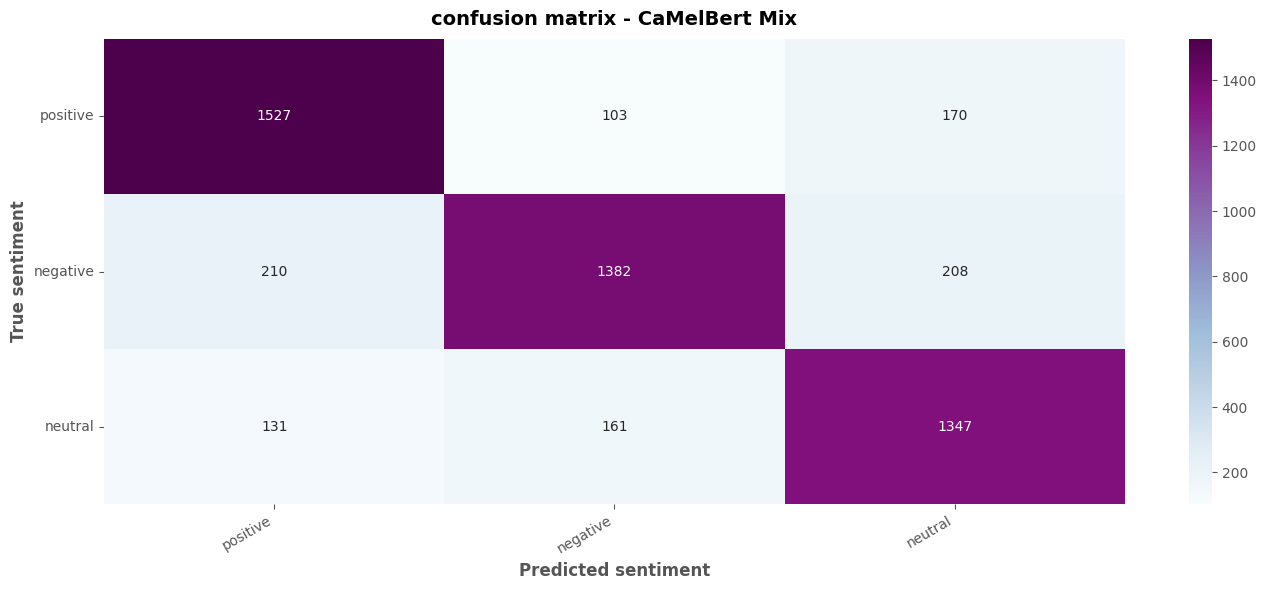

In [55]:
show_confusion_matrix(ytest,title = 'confusion matrix - CaMelBert Mix',save_dir=PY_CUSTOM_CAMEL_MIX_MODEL_DIR)

###qarib

In [ ]:
# qarib_model_huggingface_checkpoint='ahmedabdelali/bert-base-qarib'

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(qarib_model_huggingface_checkpoint)

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/718k [00:00<?, ?B/s]

In [ ]:
# PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer = tokenizer)
# train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/44209 [00:00<?, ?it/s]

  0%|          | 0/11053 [00:00<?, ?it/s]

  0%|          | 0/11053 [00:00<?, ?it/s]

In [ ]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_CUSTOM_Qarib_MODEL_DIR}checkpoint-*

ls: cannot access '/content/drive/MyDrive/Master1/Sentiment/custom_models/qarib/py/model/checkpoint-*': No such file or directory


In [ ]:
# set_seed(RANDOM_STATE)
# model , device = initialize_model(save_dir = PY_CUSTOM_Qarib_MODEL_DIR,model_name = qarib_model_huggingface_checkpoint )

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Mon Apr 14 06:28:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             42W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        

In [ ]:
# from torchinfo import summary
# summary(model)

Layer (type:depth-idx)                                       Param #
BertClassifier                                               --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   49,152,000
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Sequential: 1-2                                            --
│  

In [ ]:
# train(model= model,
#       train_dataloader = train_dataloader,
#       eval_dataloader = eval_dataloader,
#       save_dir = PY_CUSTOM_Qarib_MODEL_DIR,
#       device = device,
#       epochs = EPOCHS,
#       checkpoint = None ,#'checkpoint-epoch-7.pt',
#       evaluation = True
#       )

total steps = 1381 batches * 10 epochs = 13810 	 Batch Size 32


  0%|          | 0/13810 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |  1000   |   0.612079   |     -      |     -     |  101.17  
   1    |  1380   |   0.552335   |     -      |     -     |   37.96  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        0.595639   0.53545      0.785328         0.784316   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.776516        0.80233    0.785328    151.968023  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |  1000   |   0.350990   |     -      |     -     |  100.07  
   2    |  1380   |   0.369467   |     -      |     -     |   37.96  
------------------

In [ ]:
# tensor , ytest = bert_predict(model, test_dataloader,device)

  0%|          | 0/346 [00:00<?, ?it/s]

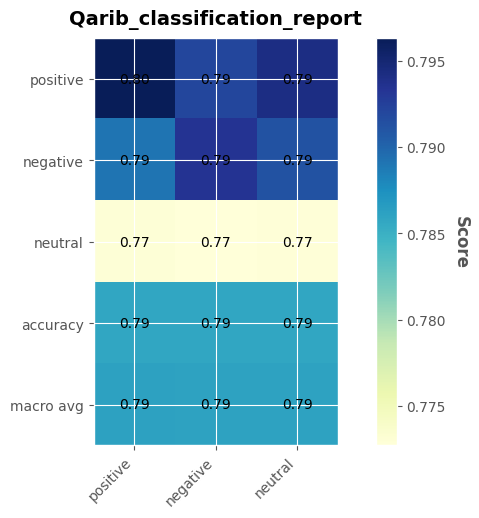

              precision    recall  f1-score   support

    positive       0.80      0.79      0.79      3500
    negative       0.79      0.79      0.79      3712
     neutral       0.77      0.77      0.77      3841

    accuracy                           0.79     11053
   macro avg       0.79      0.79      0.79     11053
weighted avg       0.79      0.79      0.79     11053



In [ ]:
# print_classification_report(ytest, PY_CUSTOM_Qarib_MODEL_DIR, 'Qarib_classification_report')



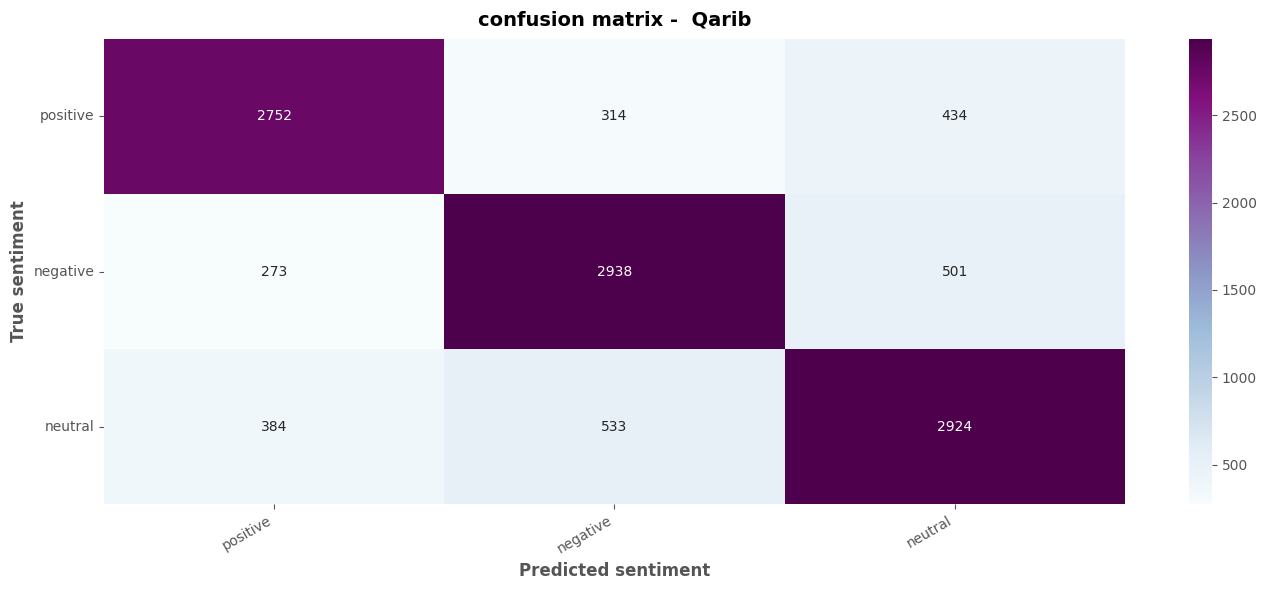

In [ ]:
# show_confusion_matrix(ytest,title = 'confusion matrix -  Qarib',save_dir=PY_CUSTOM_Qarib_MODEL_DIR)

###Giga_bert

In [ ]:
# Giga_bert_model_huggingface_checkpoint='lanwuwei/GigaBERT-v3-Arabic-and-English'

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(Giga_bert_model_huggingface_checkpoint)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/458k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/157 [00:00<?, ?B/s]

In [ ]:
# PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer = tokenizer)
# train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/44209 [00:00<?, ?it/s]

  0%|          | 0/11053 [00:00<?, ?it/s]

  0%|          | 0/11053 [00:00<?, ?it/s]

In [ ]:
# # The most recent checkpoint file will be listed at the top.
# !ls -lt {PY_CUSTOM_Giga_bert_MODEL_DIR}checkpoint-*

ls: cannot access '/content/drive/MyDrive/Master1/Sentiment/custom_models/gigabert/py/model/checkpoint-*': No such file or directory


In [ ]:
# set_seed(RANDOM_STATE)
# model , device = initialize_model(save_dir = PY_CUSTOM_Giga_bert_MODEL_DIR,model_name = Giga_bert_model_huggingface_checkpoint )

Some weights of the model checkpoint at lanwuwei/GigaBERT-v3-Arabic-and-English were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Mon Apr 14 13:35:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   29C    P0             48W /  400W |    6123MiB /  40960MiB |      0%      Default |
|                                         |                        

In [ ]:
# train(model= model,
#       train_dataloader = train_dataloader,
#       eval_dataloader = eval_dataloader,
#       save_dir = PY_CUSTOM_Arab_bert2_MODEL_DIR,
#       device = device,
#       epochs = EPOCHS,
#       checkpoint = None ,#'checkpoint-epoch-7.pt',
#       evaluation = True
#       )

total steps = 1381 batches * 10 epochs = 13810 	 Batch Size 32


  0%|          | 0/13810 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |  1000   |   0.675319   |     -      |     -     |  100.05  
   1    |  1380   |   0.595370   |     -      |     -     |   37.95  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0         0.65332  0.579273      0.759817         0.757378   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.750018       0.784837    0.759817    150.979016  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |  1000   |   0.461008   |     -      |     -     |   99.72  
   2    |  1380   |   0.469184   |     -      |     -     |   37.84  
------------------

In [ ]:
# tensor , ytest = bert_predict(model, test_dataloader,device)

  0%|          | 0/346 [00:00<?, ?it/s]

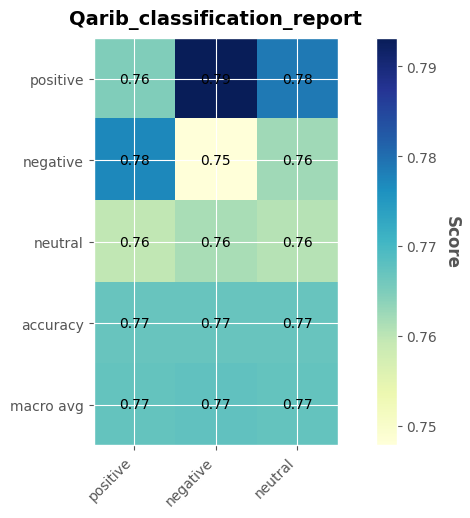

              precision    recall  f1-score   support

    positive       0.76      0.79      0.78      3500
    negative       0.78      0.75      0.76      3712
     neutral       0.76      0.76      0.76      3841

    accuracy                           0.77     11053
   macro avg       0.77      0.77      0.77     11053
weighted avg       0.77      0.77      0.77     11053



In [ ]:
# print_classification_report(ytest, PY_CUSTOM_Giga_bert_MODEL_DIR, 'Qarib_classification_report')


In [ ]:
# from torchinfo import summary
# summary(model)

Layer (type:depth-idx)                                       Param #
BertClassifier                                               --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   38,400,000
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Sequential: 1-2                                            --
│  

### ALANZI/imamu_arabic_sentimentAnalysis

> تم بناء هذا النموذج باستخدام مجموعة بيانات عربيه مصنفه الى ثلاث تصنيفات ( ايجابي ، محايد ، سلبي ) حيث يحتوي كل تصنيف على 30646 نص .

> - دقة النموذج ٨٤%




In [56]:
ALANZI_model_huggingface_checkpoint='ALANZI/imamu_arabic_sentimentAnalysis'

#### ALANZI/imamu_arabic_sentimentAnalysis Subword Tokenization

In [57]:
tokenizer = AutoTokenizer.from_pretrained(ALANZI_model_huggingface_checkpoint)

tokenizer_config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/776k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [58]:
PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer = tokenizer)
train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/15714 [00:00<?, ?it/s]

  0%|          | 0/5238 [00:00<?, ?it/s]

  0%|          | 0/5239 [00:00<?, ?it/s]

#### Training

In [59]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_CUSTOM_ALANZI3_MODEL_DIR}

total 8087075
drwx------ 2 root root       4096 Jun 13 13:57  model_3
-rw------- 1 root root      37069 Jun 11 23:06 'confusion matrix - Alanzi'
-rw------- 1 root root      35740 Jun 11 23:06  alanzi3_classification_report
-rw------- 1 root root        486 Jun 11 23:06  alanzi3_classification_report.csv
-rw------- 1 root root 1307290453 Jun 11 23:06  checkpoint-epoch-6.pt
-rw------- 1 root root       1032 Jun 11 23:06  epochs5-results.csv
-rw------- 1 root root 1307290453 Jun 11 23:05  checkpoint-epoch-5.pt
-rw------- 1 root root        879 Jun 11 23:05  epochs4-results.csv
-rw------- 1 root root 1307290453 Jun 11 23:03  checkpoint-epoch-4.pt
-rw------- 1 root root        724 Jun 11 23:03  epochs3-results.csv
-rw------- 1 root root 1307290453 Jun 11 23:02  checkpoint-epoch-3.pt
-rw------- 1 root root        573 Jun 11 23:02  epochs2-results.csv
-rw------- 1 root root  437334031 Jun 11 23:02  best_model.pth
-rw------- 1 root root 1307290453 Jun 11 23:01  checkpoint-epoch-2.pt
-rw-------

In [60]:
set_seed(RANDOM_STATE)
model , device = initialize_model(save_dir = PY_CUSTOM_ALANZI3_MODEL_DIR,model_name = ALANZI_model_huggingface_checkpoint )

config.json:   0%|          | 0.00/959 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Wed Jun 18 07:45:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             54W /  400W |    5495MiB /  40960MiB |      0%      Default |
|                                         |                        

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [61]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                       Param #
BertClassifier                                               --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   23,040,000
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Sequential: 1-2                                            --
│  

In [62]:
train(model= model,
      train_dataloader = train_dataloader,
      eval_dataloader = eval_dataloader,
      save_dir = PY_CUSTOM_ALANZI3_MODEL_DIR,
      device = device,
      epochs = EPOCHS,
      checkpoint = None, #'checkpoint-epoch-2.pt',
      evaluation = True
      )

total steps = 491 batches * 10 epochs = 4910 	 Batch Size 32


  0%|          | 0/4910 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   490   |   0.638410   |     -      |     -     |   49.15  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0         0.63841  0.572557      0.768362         0.768969   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.759187       0.800425    0.768362     55.651231  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   490   |   0.377349   |     -      |     -     |   49.10  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        0.

#### Evaluating

In [63]:
tensor , ytest = bert_predict(model, test_dataloader,device)

  0%|          | 0/164 [00:00<?, ?it/s]

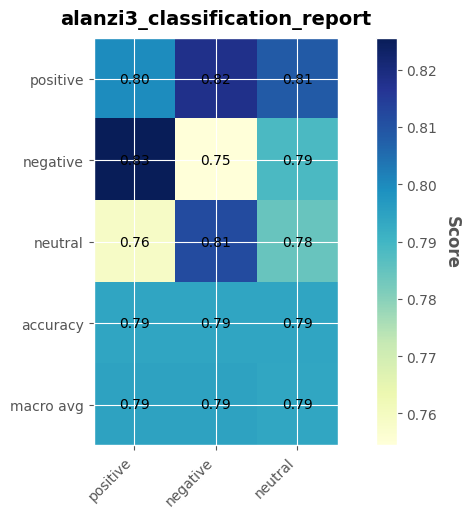

              precision    recall  f1-score   support

    positive       0.80      0.82      0.81      1800
    negative       0.83      0.75      0.79      1800
     neutral       0.76      0.81      0.78      1639

    accuracy                           0.79      5239
   macro avg       0.79      0.79      0.79      5239
weighted avg       0.80      0.79      0.79      5239



In [64]:
# Assuming ytest is the output of bert_predict
# and you have a directory PY_CUSTOM_ALANZI3_MODEL_DIR to save the report.

print_classification_report(ytest, PY_CUSTOM_ALANZI3_MODEL_DIR, 'alanzi3_classification_report')

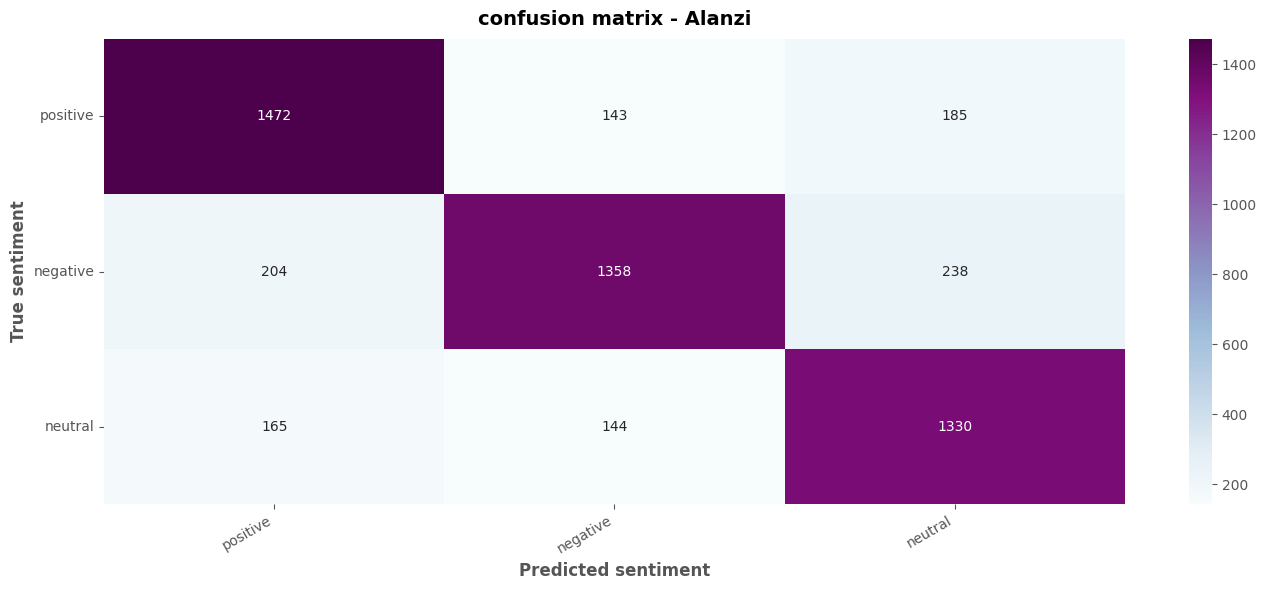

In [65]:
show_confusion_matrix(ytest,title = 'confusion matrix - Alanzi',save_dir=PY_CUSTOM_ALANZI3_MODEL_DIR)

### ARA-BERT

In [ ]:
# ARABERT_model_huggingface_checkpoint='aubmindlab/bert-base-arabert'

#### ARA-BERT Subword Tokenization

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(ARABERT_model_huggingface_checkpoint)

In [ ]:
# train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/44209 [00:00<?, ?it/s]

  0%|          | 0/11053 [00:00<?, ?it/s]

  0%|          | 0/11053 [00:00<?, ?it/s]

#### Training

In [ ]:
# # The most recent checkpoint file will be listed at the top.
# !ls -lt {PY_CUSTOM_ARABERT_MODEL_DIR}checkpoint-*

-rw------- 1 root root 4428658981 May  6 06:39 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-3.pt
-rw------- 1 root root 4428658981 May  6 06:05 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-2.pt
-rw------- 1 root root 4428658981 May  3 17:31 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-1.pt
-rw------- 1 root root 1620584720 Apr 20 04:26 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-7.pt
-rw------- 1 root root 1620584720 Apr 20 04:02 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-6.pt
-rw------- 1 root root 1620584720 Apr 20 03:39 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-5.pt
-rw------- 1 root root 1620584720 Apr 20 03:16 /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/checkpoint-epoch-4.pt


In [ ]:
# set_seed(RANDOM_STATE)
# model , device = initialize_model(save_dir = PY_CUSTOM_ARABERT_MODEL_DIR,model_name = ARABERT_model_huggingface_checkpoint )

Some weights of the model checkpoint at aubmindlab/bert-base-arabert were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sat May  6 07:12:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    30W /  70W |  11587MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

In [ ]:
# from torchinfo import summary
# summary(model)

Layer (type:depth-idx)                                  Param #
BertClassifier                                          --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              49,152,000
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Sequential: 1-2                                       --
│    └─Linear: 2-4                                      196,864
│    └─LeakyRe

In [ ]:
# train(model= model,
#       train_dataloader = train_dataloader,
#       eval_dataloader = eval_dataloader,
#       save_dir = PY_CUSTOM_ARABERT_MODEL_DIR,
#       device = device,
#       epochs = EPOCHS,
#       checkpoint = None,
#       evaluation = True
#       )

total steps = 1381 batches * 10 epochs = 13810 	 Batch Size 32


  0%|          | 0/13810 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |  1000   |   1.105903   |     -      |     -     |  421.77  
   1    |  1380   |   1.102564   |     -      |     -     |  159.60  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        1.104984  1.098155      0.347439         0.184798   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.170027        0.12758    0.347439    626.732201  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |  1000   |   1.101131   |     -      |     -     |  420.37  
   2    |  1380   |   1.102199   |     -      |     -     |  159.89  
------------------

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│ in train:115                                                                                     │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/_tensor.py:487 in backward                         │
│                                                                                                  │
│    484 │   │   │   │   create_graph=create_graph,                                                │
│    485 │   │   │   │   inputs=inputs,                                                            │
│    486 │   │   │   )                                                                             │
│ ❱  487 │   │   torch.autograd.backward(                                                          │
│    488 │   │   │   self, gradient, retain_graph, create_graph, inputs=inputs                     │
│    489 │   │   )                                                                                 │
│    490                                                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:200 in backward               │
│                                                                                                  │
│   197 │   # The reason we repeat same the comment below is that                                  │
│   198 │   # some Python versions print out the first line of a multi-line function               │
│   199 │   # calls in the traceback and some print out the last line                              │
│ ❱ 200 │   Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the bac   │
│   201 │   │   tensors, grad_tensors_, retain_graph, create_graph, inputs,                        │
│   202 │   │   allow_unreachable=True, accumulate_grad=True)  # Calls into the C++ engine to ru   │
│   203                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

### We considered the one without the classfication layer because it is much better

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# # Instantiate tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabert')
# model = AutoModelForSequenceClassification.from_pretrained(PY_ARABERT_MODEL_DIR )

# save_architecture_design(save_dir = PY_CUSTOM_ARABERT_MODEL_DIR,model_name='AraBERT',model=model)


tokenizer_config.json:   0%|          | 0.00/637 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/717k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.26M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

OSError: Incorrect path_or_model_id: '/content/drive/MyDrive/Master/Sentiment/models/arabert/py/model/checkpoint-19302'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
# # Use the loaded model for inference
# inputs = tokenizer("مش بحبك", return_tensors="pt")
# outputs = model(**inputs)
# logits = outputs.logits
# logits

tensor([[-1.3145,  3.5075, -2.2048]], grad_fn=<AddmmBackward0>)

### MAR-BERTV2 (arabert and marbert)

> MARBERT is a large-scale pre-trained masked language model focused on both Dialectal Arabic (DA) and MSA. Arabic has multiple varieties. To train MARBERT, we randomly sample 1B Arabic tweets from a large in-house dataset of about 6B tweets. We only include tweets with at least 3 Arabic words, based on character string matching, regardless whether the tweet has non-Arabic string or not. That is, we do not remove non-Arabic so long as the tweet meets the 3 Arabic word criterion. The dataset makes up 128GB of text (15.6B tokens

> Arabic-MARBERT-Sentiment Model is a Sentiment analysis model that was built by fine-tuning the MARBERT model. For the fine-tuning, I used KAUST dataset, which includes 3 labels(positive,negative,and neutral).

> [hugging face](https://huggingface.co/Ammar-alhaj-aliarabic-MARBERT-sentiment)
> [ARBERT & MARBERT: Deep Bidirectional Transformers for Arabic papers](https://aclanthology.org/2021.acl-long.551.pdf)


In [66]:
MARBERT_model_huggingface_checkpoint='UBC-NLP/MARBERTv2'

#### MAR-BERT Subword Tokenization

In [67]:
tokenizer = AutoTokenizer.from_pretrained(MARBERT_model_huggingface_checkpoint)

tokenizer_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [68]:
PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer = tokenizer)
train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/15714 [00:00<?, ?it/s]

  0%|          | 0/5238 [00:00<?, ?it/s]

  0%|          | 0/5239 [00:00<?, ?it/s]

#### Training

In [69]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_CUSTOM_MARBERT_MODEL_DIR}checkpoint-*

-rw------- 1 root root 1952410453 Jun 16 11:53 /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/checkpoint-epoch-5.pt
-rw------- 1 root root 1952410453 Jun 16 11:51 /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/checkpoint-epoch-4.pt
-rw------- 1 root root 1952410453 Jun 16 11:49 /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/checkpoint-epoch-3.pt
-rw------- 1 root root 1952410453 Jun 16 11:47 /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/checkpoint-epoch-6.pt
-rw------- 1 root root 1952410453 Jun 16 11:47 /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/checkpoint-epoch-2.pt
-rw------- 1 root root 1952410453 Jun 16 11:43 /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/checkpoint-epoch-1.pt


In [70]:
set_seed(RANDOM_STATE)
model , device = initialize_model(model_name = MARBERT_model_huggingface_checkpoint ,save_dir=PY_CUSTOM_MARBERT_MODEL_DIR)

config.json:   0%|          | 0.00/757 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/654M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Wed Jun 18 07:58:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             54W /  400W |    7245MiB /  40960MiB |      0%      Default |
|                                         |                        

In [71]:
train(model= model,
      train_dataloader = train_dataloader,
      eval_dataloader = eval_dataloader,
      save_dir = PY_CUSTOM_MARBERT_MODEL_DIR,
      device = device,
      epochs = EPOCHS,
      checkpoint = None,
      evaluation = True
      )

total steps = 491 batches * 10 epochs = 4910 	 Batch Size 32


  0%|          | 0/4910 [00:00<?, ?it/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   490   |   0.594463   |     -      |     -     |   51.21  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        0.594463   0.52237      0.797793         0.798558   

   val_f1_macro  val_precision  val_recall  time elapsed  
0      0.789687       0.819068    0.797793      57.75906  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   490   |   0.339712   |     -      |     -     |   51.25  
----------------------------------------------------------------------
   epoch  avg_train_loss  val_loss  val_accuracy  val_f1_weighted  \
0      0        0.

In [72]:
tensor , ytest = bert_predict(model, test_dataloader,device)


  0%|          | 0/164 [00:00<?, ?it/s]

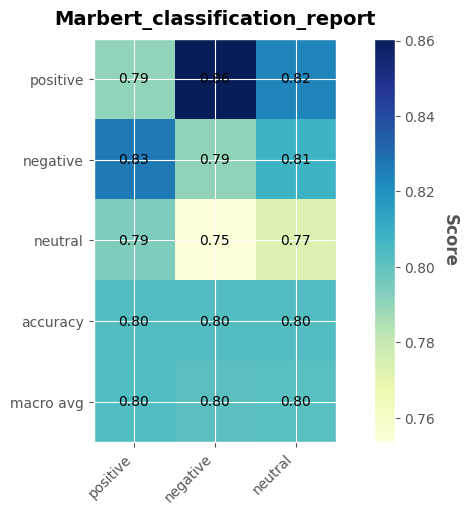

              precision    recall  f1-score   support

    positive       0.79      0.86      0.82      1800
    negative       0.83      0.79      0.81      1800
     neutral       0.79      0.75      0.77      1639

    accuracy                           0.80      5239
   macro avg       0.80      0.80      0.80      5239
weighted avg       0.80      0.80      0.80      5239



In [73]:
print_classification_report(ytest, PY_CUSTOM_MARBERT_MODEL_DIR, 'Marbert_classification_report')

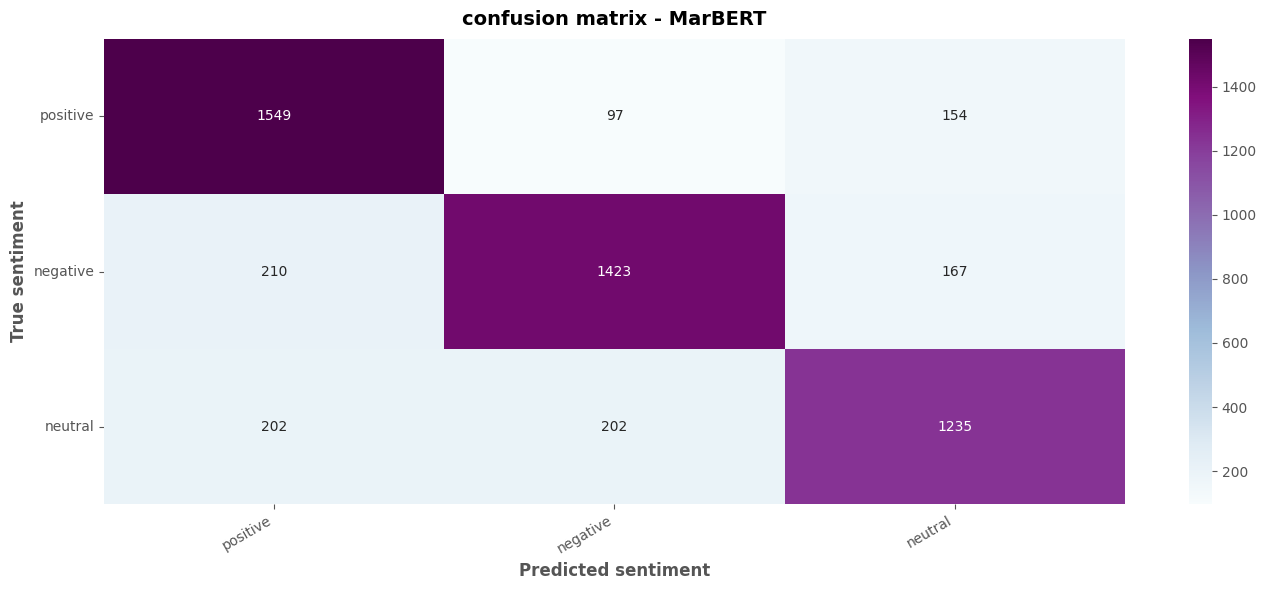

In [74]:
show_confusion_matrix(ytest,title = 'confusion matrix - MarBERT',save_dir=PY_CUSTOM_MARBERT_MODEL_DIR)

In [75]:
# # plot the training and validation loss/metrics over epochs
# import matplotlib.pyplot as plt


# train_history = model.state.log_history

# # `train_history` is a list of dictionaries containing the training history
# # including the loss and other metrics
# train_loss = [x['loss'] for x in train_history if 'loss' in x and 'eval_loss' in x]
# eval_accuracy = [x['eval_accuracy'] for x in train_history if 'eval_accuracy' in x]
# eval_loss = [x['eval_loss'] for x in train_history if 'eval_loss' in x]



# # Plot the loss curves
# plt.plot(eval_loss, label='Validation loss')

# plt.plot(eval_accuracy, label='Validation accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [76]:
# evaluate the model on the test dataset
# if trainer.state.epochs:
#   result = trainer.evaluate(tokenized_datasets['test'])
#   print(f'evaulatuin loss : {result["eval_loss"]}  , evaluation accuracy:{result["eval_accuracy"]}')

# Ensemble Method

In [34]:
CAMEL_DA_model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment'
#ARABERT_model_huggingface_checkpoint='Yousefmd/arabert-sentiment-analysis'
MARBERT_model_huggingface_checkpoint='UBC-NLP/MARBERTv2'
CAMEL_MIX_model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment'
ALANZI_model_huggingface_checkpoint='ALANZI/imamu_arabic_sentimentAnalysis'
#qarib_model_huggingface_checkpoint = 'ahmedabdelali/bert-base-qarib'
#Giga_bert_model_huggingface_checkpoint ='lanwuwei/GigaBERT-v3-Arabic-and-English'



#### CAMEL-BERT-MIX Subword Tokenization

In [35]:
tokenizer = AutoTokenizer.from_pretrained(CAMEL_MIX_model_huggingface_checkpoint)

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [36]:
train_dataloader , eval_dataloader ,test_dataloader  = data_loader(dataset,tokenizer)

  0%|          | 0/15714 [00:00<?, ?it/s]

  0%|          | 0/5238 [00:00<?, ?it/s]

  0%|          | 0/5239 [00:00<?, ?it/s]

### Models

In [37]:
set_seed(RANDOM_STATE)
from transformers import AutoTokenizer, AutoModelForSequenceClassification

CAMEL_MIX_model,device = initialize_model(save_dir = PY_CUSTOM_CAMEL_MIX_MODEL_DIR,model_name = CAMEL_MIX_model_huggingface_checkpoint )
CAMEL_DA_model , _ = initialize_model(save_dir = PY_CUSTOM_CAMEL_MODEL_DIR,model_name = CAMEL_DA_model_huggingface_checkpoint )
MARBERT_model ,_ =initialize_model(save_dir = PY_CUSTOM_MARBERT_MODEL_DIR,model_name = MARBERT_model_huggingface_checkpoint )
ALANZI_model ,_=initialize_model(save_dir = PY_CUSTOM_ALANZI_MODEL_DIR,model_name = ALANZI_model_huggingface_checkpoint )
#Qarib_model ,_=initialize_model(save_dir = PY_CUSTOM_Qarib_MODEL_DIR,model_name = qarib_model_huggingface_checkpoint )
#Giga_model ,_=initialize_model(save_dir = PY_CUSTOM_Giga_bert_MODEL_DIR,model_name = Giga_bert_model_huggingface_checkpoint )

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Wed Jun 18 08:36:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             46W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Wed Jun 18 08:36:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             51W /  400W |     893MiB /  40960MiB |      0%      Default |
|                                         |                        

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/757 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/654M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Wed Jun 18 08:36:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             51W /  400W |    1343MiB /  40960MiB |      0%      Default |
|                                         |                        

config.json:   0%|          | 0.00/959 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB
Wed Jun 18 08:36:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             51W /  400W |    1999MiB /  40960MiB |      0%      Default |
|                                         |                        

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [38]:
best_model_path = "best_model.pth"
CAMEL_MIX_model = load_model_from_checkpoint(CAMEL_MIX_model,save_dir = PY_CUSTOM_CAMEL_MIX_MODEL_DIR,checkpoint=best_model_path)
CAMEL_DA_model =  load_model_from_checkpoint(CAMEL_DA_model,save_dir = PY_CUSTOM_CAMEL_MODEL_DIR,checkpoint=best_model_path)
MARBERT_model = load_model_from_checkpoint(MARBERT_model,save_dir = PY_CUSTOM_MARBERT_MODEL_DIR,checkpoint=best_model_path)
ALANZI_model = load_model_from_checkpoint(ALANZI_model,save_dir = PY_CUSTOM_ALANZI3_MODEL_DIR,checkpoint=best_model_path)
#Qarib_model = load_model_from_checkpoint(Qarib_model,save_dir = PY_CUSTOM_Qarib_MODEL_DIR,checkpoint=best_model_path)
#Giga_model = load_model_from_checkpoint(Giga_model,save_dir = PY_CUSTOM_Giga_bert_MODEL_DIR,checkpoint=best_model_path)



Loading model from this checkpoint /content/drive/MyDrive/Master1/Sentiment/custom_models/camel_mix/py/model/model_2/best_model.pth
loaded checkpoint of CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment successfully
Loading model from this checkpoint /content/drive/MyDrive/Master1/Sentiment/custom_models/camel/py/model/model_2/best_model.pth
loaded checkpoint of CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment successfully
Loading model from this checkpoint /content/drive/MyDrive/Master1/Sentiment/custom_models/marbert/py/model/model_2/best_model.pth
loaded checkpoint of UBC-NLP/MARBERTv2 successfully
Loading model from this checkpoint /content/drive/MyDrive/Master1/Sentiment/custom_models/alanzi3/py/model/model_2/best_model.pth
loaded checkpoint of ALANZI/imamu_arabic_sentimentAnalysis successfully


#### Evaluating

In [39]:
ensemble_models = [
                   #ARABERT_model,
                   CAMEL_MIX_model,
                   CAMEL_DA_model,
                   MARBERT_model,
                   ALANZI_model,
                   #Qarib_model

                   ]


In [40]:
for model in ensemble_models:
  print(model.model_name)
  df = evaluate_test(model, test_dataloader ,save_dir=PY_ENSEMBLE_MODEL_DIR1,device=device)


CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment
       loss  accuracy  f1_weighted  f1_macro  precision    recall
0  0.564667  0.818225     0.817749  0.809795   0.830237  0.818225
CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment
       loss  accuracy  f1_weighted  f1_macro  precision    recall
0  0.483109  0.813685     0.813747   0.80536   0.825871  0.813685
UBC-NLP/MARBERTv2
       loss  accuracy  f1_weighted  f1_macro  precision   recall
0  2.006081   0.34351     0.305319  0.298298   0.377987  0.34351
ALANZI/imamu_arabic_sentimentAnalysis
       loss  accuracy  f1_weighted  f1_macro  precision    recall
0  0.822617  0.790214     0.789609  0.781393   0.805712  0.790214


In [44]:
tensor , y_pred,df,contribution_percentages = ensemble_bert_predict(ensemble_models, test_dataloader, device,save_dir=PY_ENSEMBLE_MODEL_DIR1 ,is_accuracy=True)
df.head(len(ensemble_models))

successfully loaded accuracies
Saved Models' Accuracies in /content/drive/MyDrive/Master1/Sentiment/custom_models/ensemble1/ensemble2/Models'_Accuracies.csv


  0%|          | 0/164 [00:00<?, ?it/s]

computing logits ...


,name,contribution_percentage,accuracy
0,CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment,0.30,0.818286
1,CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment,0.29,0.813514
2,UBC-NLP/MARBERTv2,0.12,0.343577
3,ALANZI/imamu_arabic_sentimentAnalysis,0.29,0.790227


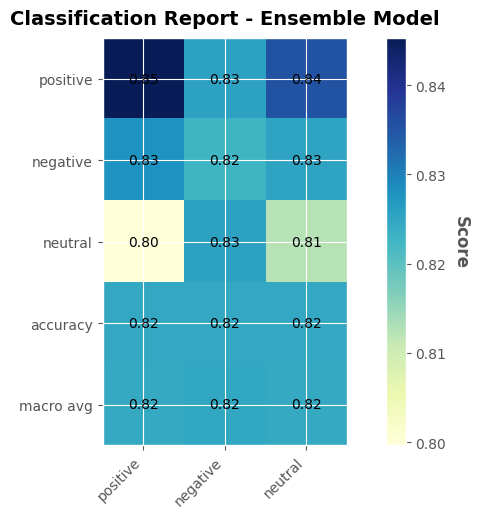

              precision    recall  f1-score   support

    positive       0.85      0.83      0.84      1800
    negative       0.83      0.82      0.83      1800
     neutral       0.80      0.83      0.81      1639

    accuracy                           0.82      5239
   macro avg       0.82      0.82      0.82      5239
weighted avg       0.83      0.82      0.82      5239



In [45]:
print_classification_report(y_pred,save_dir=PY_ENSEMBLE_MODEL_DIR1,title='Classification Report - Ensemble Model')

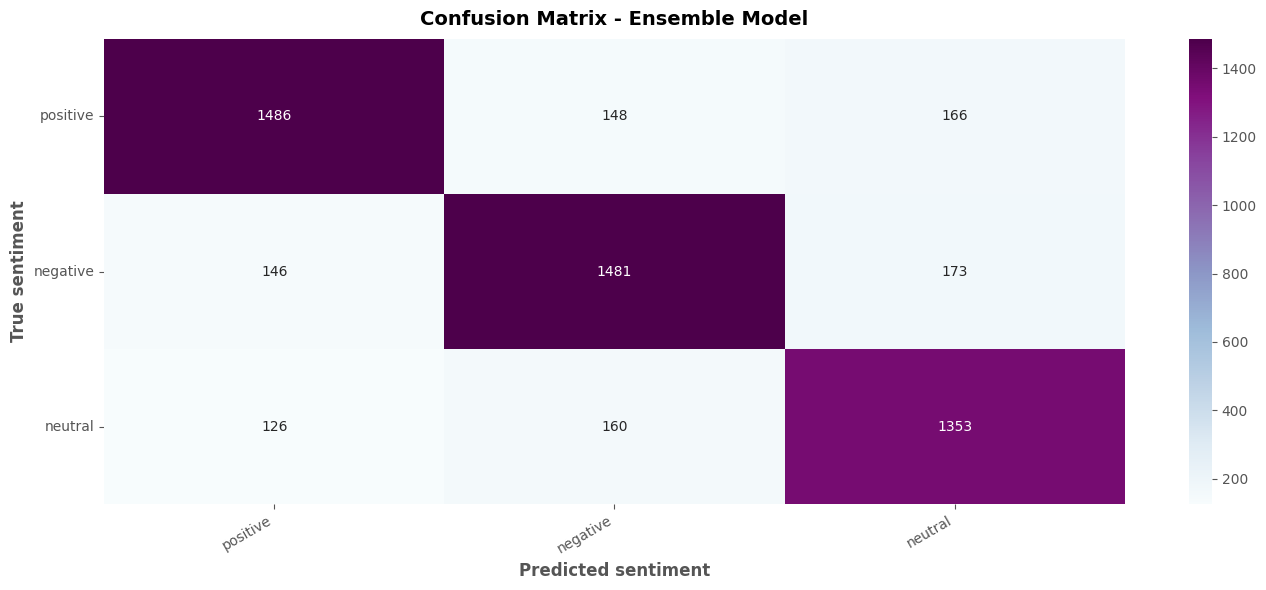

In [46]:
show_confusion_matrix(y_pred,title = 'Confusion Matrix - Ensemble Model',save_dir = PY_ENSEMBLE_MODEL_DIR1)